# Variational AutoEncoders trained with deformed ELBO


## Setup Code



In [ ]:
%load_ext autoreload
%autoreload 2

### Google Colab Setup


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = None
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', 'VAE')
print(os.listdir(GOOGLE_DRIVE_PATH))

In [ ]:
import sys
sys.path.append(GOOGLE_DRIVE_PATH)

import time, os
os.environ["TZ"] = "US/Eastern"
time.tzset()

Load several useful packages that are used in this notebook:

In [ ]:
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import init
import torchvision
import torchvision.transforms as T
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as dset

import matplotlib.pyplot as plt
%matplotlib inline

# for plotting
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['font.size'] = 16
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

We will use GPUs to accelerate our computation in this notebook. Run the following to make sure GPUs are enabled:

In [ ]:
if torch.cuda.is_available():
    print('Good to go!')
else:
    print('Please set GPU via Edit -> Notebook Settings.')

Good to go!


## Load MNIST Dataset

In [ ]:
batch_size = 128

mnist_train = dset.MNIST('./MNIST_data', train=True, download=True,
                           transform=T.ToTensor())
loader_train = DataLoader(mnist_train, batch_size=batch_size,
                          shuffle=True, drop_last=True, num_workers=2)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw



In [ ]:
# batch_size = 128
# mnist_train = torchvision.datasets.FashionMNIST(
#     root = './data/FashionMNIST',
#     train = True,
#     download = True,
#     transform=T.ToTensor()
# )
# loader_train = DataLoader(mnist_train, batch_size=batch_size,
#                           shuffle=True, drop_last=True, num_workers=2)

In [ ]:
mnist_test = dset.MNIST('./MNIST_data', train=False, download=True,
                           transform=T.ToTensor())
loader_test = DataLoader(mnist_test, batch_size=1,
                          shuffle=True, drop_last=True, num_workers=2)
len(loader_test)

10000

## Visualize dataset

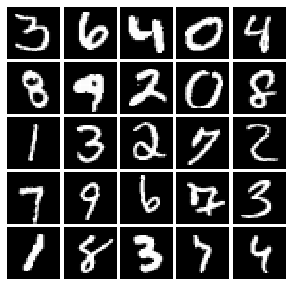

In [ ]:
from helper import show_images

imgs = loader_test.__iter__().__next__()[0].view(25, 784)
show_images(imgs)

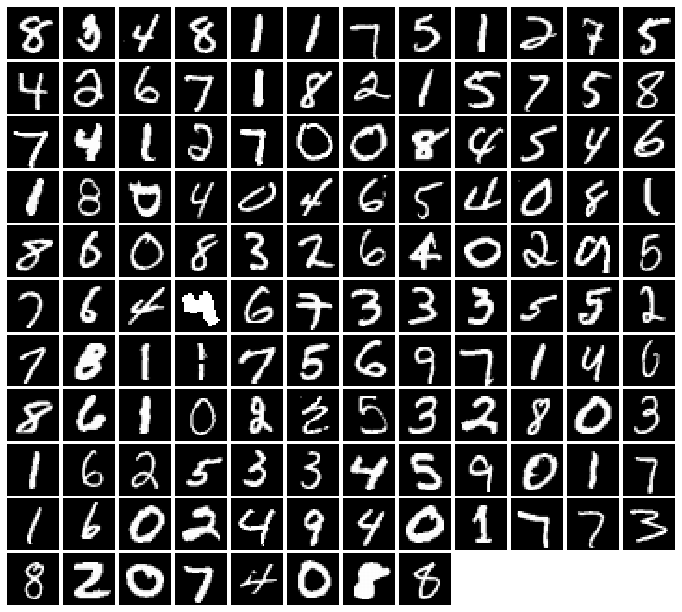

In [ ]:
from helper import show_images

# imgs = loader_train.__iter__().__next__()[0].view(batch_size, 784)
loader = loader_train.__iter__().__next__()
imgs = loader[0].view(batch_size, 784)
labels = loader[1]
show_images(imgs)


## Train a model

In [ ]:
num_epochs = 500
latent_size = 50
from vae import VAE
from helper import train_vae
input_size = 28*28
device = 'cuda'
vae_model = VAE(input_size, latent_size=latent_size)
# vae_model = torch.load('/content/drive/My Drive/VAE/vae.pth')
vae_model.cuda()
for epoch in range(0, num_epochs):
    train_vae(epoch, vae_model, loader_train, alpha=0.5)

Train Epoch: 0 	Loss: 150.491058
Train Epoch: 1 	Loss: 130.790436
Train Epoch: 2 	Loss: 119.167633
Train Epoch: 3 	Loss: 112.942444
Train Epoch: 4 	Loss: 111.511612
Train Epoch: 5 	Loss: 107.018425
Train Epoch: 6 	Loss: 104.313492
Train Epoch: 7 	Loss: 106.209557
Train Epoch: 8 	Loss: 103.589630
Train Epoch: 9 	Loss: 98.806076
Train Epoch: 10 	Loss: 101.019699
Train Epoch: 11 	Loss: 99.421173
Train Epoch: 12 	Loss: 95.980194
Train Epoch: 13 	Loss: 99.260468
Train Epoch: 14 	Loss: 99.322083
Train Epoch: 15 	Loss: 97.596657
Train Epoch: 16 	Loss: 97.785484
Train Epoch: 17 	Loss: 98.743240
Train Epoch: 18 	Loss: 91.451698
Train Epoch: 19 	Loss: 95.357079
Train Epoch: 20 	Loss: 97.082245
Train Epoch: 21 	Loss: 95.657951
Train Epoch: 22 	Loss: 97.276009
Train Epoch: 23 	Loss: 94.426514
Train Epoch: 24 	Loss: 94.660683
Train Epoch: 25 	Loss: 99.865433
Train Epoch: 26 	Loss: 95.238525
Train Epoch: 27 	Loss: 98.175507
Train Epoch: 28 	Loss: 91.265060
Train Epoch: 29 	Loss: 96.406494
Train Epoc

In [ ]:
torch.save(vae_model, '/content/drive/My Drive/VAE/vae_0_5.pth')

In [ ]:
num_epochs = 500
latent_size = 50
from vae import VAE
from a6_helper import train_vae
input_size = 28*28
device = 'cuda'
vae_model = VAE(input_size, latent_size=latent_size)
# vae_model = torch.load('/content/drive/My Drive/VAE/vae.pth')
vae_model.cuda()
for epoch in range(0, num_epochs):
    train_vae(epoch, vae_model, loader_train, alpha=1.0)

In [ ]:
torch.save(vae_model, '/content/drive/My Drive/VAE/vae.pth')

In [ ]:
list_model = ['/content/drive/My Drive/VAE/vae_minus_50.pth',
              '/content/drive/My Drive/VAE/vae_minus_5.pth',
              '/content/drive/My Drive/VAE/vae_minus_1.pth',
              '/content/drive/My Drive/VAE/iwae.pth',
              '/content/drive/My Drive/VAE/vae_0_3.pth',
              '/content/drive/My Drive/VAE/vae_0_5.pth',
              '/content/drive/My Drive/VAE/vae_0_8.pth',
              '/content/drive/My Drive/VAE/vae_0_9.pth',
              '/content/drive/My Drive/VAE/vae_0_99.pth',
              '/content/drive/My Drive/VAE/vae_1_01.pth',
              '/content/drive/My Drive/VAE/vae_1_2.pth'
              '/content/drive/My Drive/VAE/vae_2.pth']

alpha_values = [-50, -5, -1, 0, 0.3, 0.5, 0.8, 0.9, 0.99, 1.01, 1.2, 2]

In [ ]:
num_epochs = 500
latent_size = 50
from vae import VAE
from a6_helper import train_vae
input_size = 28*28
device = 'cuda'

for i in range(len(list_model)):
  vae_model = VAE(input_size, latent_size=latent_size)
  vae_model.cuda()
  for epoch in range(0, num_epochs):
      train_vae(epoch, vae_model, loader_train, alpha=alpha_values[i])
  torch.save(vae_model, list_model[i])

In [ ]:
from skimage import metrics
import numpy as np
from vae import loss_function_alpha, loss_function_alpha_np
import matplotlib.gridspec as gridspec

samples = np.zeros((25, 1, 28 ,28))
out = np.zeros((25, 1, 28 ,28))
vae_model = torch.load('/content/drive/My Drive/models/vae_0_9.pth')
vae_model.eval()
for i in range(25):
  img = imgs[i].view(28, 28).data.cpu().numpy()
  # samples[i, 0, :, :] = img
  img0 = imgs[i].view(1, 1, 28, 28)
  img0 = img0.to(device='cuda')
  sample = vae_model(img0)
  sample0 = sample[0][0].view(28, 28).data.cpu().numpy()
  # elbo.append(loss_function_alpha(sample[0], img0, sample[1], sample[2], sample[3], alpha=0.0, k=2))

  out[i, 0, :, :] = sample0
  # k += metrics.peak_signal_noise_ratio(img, sample0)
  # print(metrics.peak_signal_noise_ratio(img, sample0))
  # l += metrics.structural_similarity(img, sample0, multichannel=False)
# print(k/100)
# print(l/100)
# print(np.sum(elbo)/100)


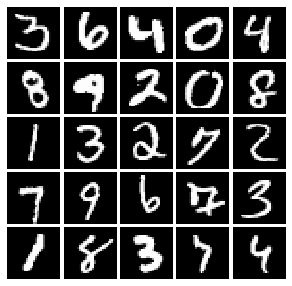

In [ ]:
fig = plt.figure(figsize=(5, 5))
gspec = gridspec.GridSpec(5, 5)
gspec.update(wspace=0.05, hspace=0.05)
for i, sample in enumerate(imgs):
    ax = plt.subplot(gspec[i])
    plt.axis('off')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_aspect('equal')
    plt.imshow(sample.reshape(28,28), cmap='Greys_r')

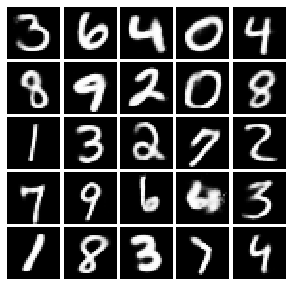

In [ ]:
fig = plt.figure(figsize=(5, 5))
gspec = gridspec.GridSpec(5, 5)
gspec.update(wspace=0.05, hspace=0.05)
for i, sample in enumerate(out):
    ax = plt.subplot(gspec[i])
    plt.axis('off')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_aspect('equal')
    plt.imshow(sample.reshape(28,28), cmap='Greys_r')

## NLL vs alpha

In [ ]:
list_y = []
list_nll = []
list_model = ['/content/drive/My Drive/models/iwae.pth',
              '/content/drive/My Drive/VAE/vae_0_1.pth',
              '/content/drive/My Drive/VAE/vae_0_2.pth',
              '/content/drive/My Drive/VAE/vae_0_3.pth',
              '/content/drive/My Drive/VAE/vae_0_4.pth',
              '/content/drive/My Drive/VAE/vae_0_5.pth',
              '/content/drive/My Drive/VAE/vae_0_6.pth',
              '/content/drive/My Drive/VAE/vae_0_7.pth',
              '/content/drive/My Drive/models/vae_0_8.pth',
              '/content/drive/My Drive/models/vae_0_9.pth',
              '/content/drive/My Drive/VAE/vae.pth']

for i in list_model:
  for j in range(1):
    # print(j)
    list1, nll = iwae_metric_by_label(i)
  list_y.append(list1)
  list_nll.append(nll)

In [ ]:
list_y = []

list_model = ['/content/drive/My Drive/models/vae_minus_50.pth',
              '/content/drive/My Drive/models/vae_minus_5.pth',
              '/content/drive/My Drive/models/vae_minus_1.pth',
              '/content/drive/My Drive/models/iwae.pth',
              '/content/drive/My Drive/models/VAE/vae_0_1.pth',
              '/content/drive/My Drive/models/VAE/vae_0_2.pth',
              '/content/drive/My Drive/models/vae_0_3.pth',
              '/content/drive/My Drive/models/VAE/vae_0_4.pth',
              '/content/drive/My Drive/models/vae_0_5.pth',
              '/content/drive/My Drive/models/vae_0_8.pth',
              '/content/drive/My Drive/models/vae_0_9.pth',
              '/content/drive/My Drive/models/vae_0_99.pth',
              '/content/drive/My Drive/VAE_demo/vae.pth',
              '/content/drive/My Drive/models/vae_1_01.pth',
              '/content/drive/My Drive/models/vae_2.pth']

for i in list_model:
  list1 = []
  for j in range(1):
    print(j)
    list1.append(iwae_metric(i))
  list_y.append(list1)

In [ ]:
import matplotlib.pyplot as plt
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
alpha_values = [-50, -5, -1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99, 1.0, 1.01, 2.0]
# y = [99.55, 97.57, 95.27, 96.85, 93.98]
plt.plot(x, list_nll, label = "NLL vs alpha values")
plt.xticks(x, alpha_values)
plt.legend()
plt.show()

In [ ]:
list_nll.reverse()

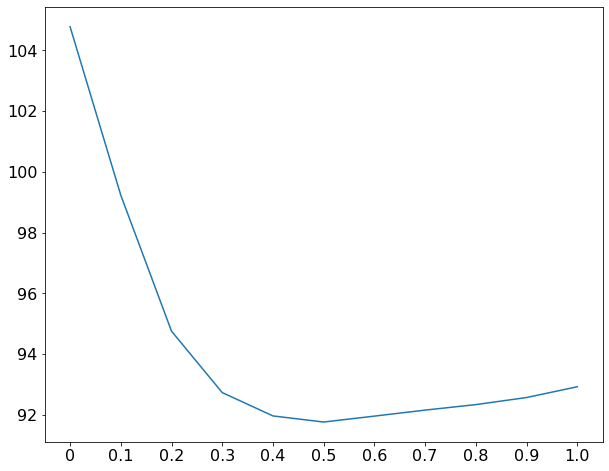

In [ ]:
import matplotlib.pyplot as plt
x = [1,2,3,4,5,6,7,8,9,10,11]
alpha_values = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# y = [99.55, 97.57, 95.27, 96.85, 93.98]
plt.plot(x, list_nll)
plt.xticks(x, alpha_values)
# plt.legend()
plt.show()

In [ ]:
import numpy as np

x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
alpha_values = [-50, -5, -1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.8, 0.9, 0.99, 1.0, 1.01, 2.0]
# y = [99.55, 97.57, 95.27, 96.85, 93.98]
list_nll = []
for i in range(12):
  list_nll.append(np.mean(list_y[i]))
list_low = []
list_up = []
for i in range(12):
  ci = 1.96 * np.std(list_y[i])/np.sqrt(5)
  list_low.append(np.mean(list_y[i])-ci)
  list_up.append(np.mean(list_y[i])+ci)
fig, ax = plt.subplots()
ax.plot(x, list_nll)
ax.fill_between(x, list_low, list_up, color='b', alpha=.1)

# plt.plot(x, list_nll, label = "NLL vs alpha values")
# plt.xticks(x, alpha_values)
# plt.legend()
plt.show()

In [ ]:
class VAE(nn.Module):
    def __init__(self, input_size, latent_size=15):
        super(VAE, self).__init__()
        self.input_size = input_size  # H*W
        self.latent_size = latent_size  # Z
        self.hidden_dim = None  # H_d
        self.encoder = None
        self.mu_layer = None
        self.logvar_layer = None
        self.decoder = None

        self.hidden_dim = 300
        self.encoder = nn.Sequential(nn.Flatten(),
        nn.Linear(input_size, self.hidden_dim),
        nn.ReLU(),
        nn.Linear(self.hidden_dim, self.hidden_dim),
        nn.ReLU(),
        nn.Linear(self.hidden_dim, self.hidden_dim),
        nn.ReLU()
        )
        self.mu_layer = nn.Linear(self.hidden_dim, latent_size)
        self.logvar_layer = nn.Linear(self.hidden_dim, latent_size)

        self.decoder = nn.Sequential(
        nn.Linear(latent_size, self.hidden_dim),
        nn.ReLU(),
        nn.Linear(self.hidden_dim, self.hidden_dim),
        nn.ReLU(),
        nn.Linear(self.hidden_dim, self.hidden_dim),
        nn.ReLU(),
        nn.Linear(self.hidden_dim, input_size),
        nn.Sigmoid(),
        nn.Unflatten(1, (1, 28, 28))
        )

    def forward(self, x, k=50):

        N = x.shape[0]
        x_hat = None
        mu = None
        logvar = None

        hidden = self.encoder(x)
        mu = self.mu_layer(hidden)
        logvar = self.logvar_layer(hidden)
        mu = mu.repeat(k, 1)
        logvar = logvar.repeat(k, 1)

        z_list = []
        x_hat = []

        x = x.repeat(k, 1, 1, 1)
        z = reparametrize(mu, logvar)

        x_hat = self.decoder(z)

        # for i in range(k):
        #   z = reparametrize(mu, logvar)
        #   z_list.append(z)
        #   x_hat.append(self.decoder(z))

        # output = self.decoder(z)
        # mu1 = self.mu_layer1(z1)
        # logvar1 = self.logvar_layer1(z1)
        # x_hat1 = reparametrize(mu1, logvar1)
        # s = nn.Sigmoid()
        # x_hat = s(x_hat1)
        # x_hat = x_hat.view(128, 1, 28, 28)

        return x_hat, mu, logvar, z

def reparametrize(mu, logvar):
    """

    """
    z = None

    std = torch.exp(0.5*logvar) # cuz, log(std^2) = 2 log(std)
    eps = torch.randn_like(std) # standard gaussian
    z = mu + std * eps
    # print(z2)

    return z

## NLL by categories and alpha

In [ ]:
z = torch.tensor([1, 2, 3, 4])
x = z.view(4, 1)
x.view(2, 2)

In [ ]:
list_complete = []
for i in list_model:
  list_complete.append(iwae_metric_by_label(i))

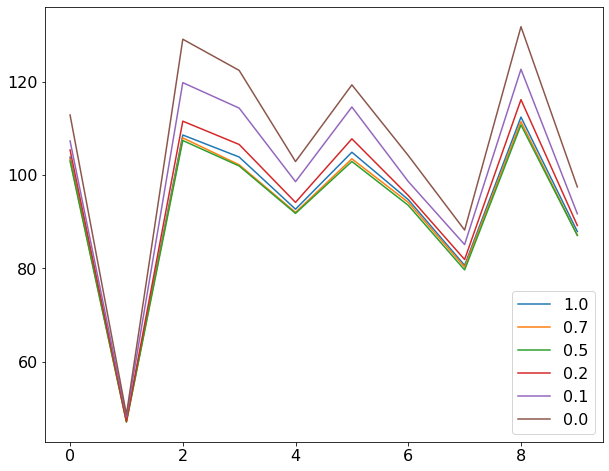

In [ ]:
# y = [99.55, 97.57, 95.27, 96.85, 93.98]
# for i in list_complete:
x = [1,2,3,4,5,6,7,8,9,10,11]
alpha_values = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

keys = list(range(10))
plt.plot(keys, list_y[0], label = "1.0")
plt.plot(keys, list_y[3], label = "0.7")
plt.plot(keys, list_y[5], label = "0.5")
# plt.plot(keys, list_y[7], label = "0.7")
plt.plot(keys, list_y[8], label = "0.2")
plt.plot(keys, list_y[9], label = "0.1")
plt.plot(keys, list_y[10], label = "0.0")
plt.legend()
plt.show()

## Test with complete data set

In [ ]:
from skimage import metrics
import numpy as np
from vae import loss_function_alpha, iwae_np, iwae_np1

# vae_model = torch.load('/content/drive/My Drive/VAE/vae_0_99.pth')

def iwae_metric(path):
  vae_model = torch.load(path)
  iwae = []
  vae_model.eval()
  k = 0
  for batch_idx, (data, labels) in enumerate(loader_test):
      img0 = data.to(device='cuda')
      # sample = vae_model(img0)
      iwae.append(iwae_np1(img0, vae_model, k=50).data.cpu().numpy())
      # k += 1
  # print(np.sum(iwae)/10000)
  return np.sum(iwae)/10000

def iwae_metric_by_label(path):
  keys = list(range(0, 10))
  values = list(np.zeros((10,)))
  dictionary1 = dict(zip(keys, values))
  dictionary2 = dict(zip(keys, values))
  vae_model = torch.load(path)
  iwae = []
  vae_model.eval()
  for batch_idx, (data, labels) in enumerate(loader_test):
      img0 = data.to(device='cuda')
      iwae.append(iwae_np1(img0, vae_model, k=50).data.cpu().numpy())
      dictionary1[int(labels)] += iwae[-1]
      dictionary2[int(labels)] += 1
  # print(np.sum(iwae)/10000)
  list_v1 = []
  total_nll = np.sum(iwae)/10000
  for i in range(0, 10):
    list_v1.append(dictionary1[i]/dictionary2[i])

  return list_v1, total_nll


# IWAE(Importance Weighted Test Log-likelihood)

In [ ]:
from skimage import metrics
import numpy as np
from vae import loss_function_alpha, iwae_np, iwae_np1

vae_model = torch.load('/content/drive/My Drive/VAE/vae_0_99.pth')
iwae = []
samples = np.zeros((100, 1, 28 ,28))
out = np.zeros((100, 1, 28 ,28))
vae_model.eval()
k = 0
l = 0


for i in range(100):
  img = imgs[i].view(28, 28).data.cpu().numpy()
  samples[i, 0, :, :] = img
  img0 = imgs[i].view(1, 1, 28, 28)
  img0 = img0.to(device='cuda')
  sample = vae_model(img0)
  # sample0 = sample[0].view(28, 28).data.cpu().numpy()
  iwae.append(iwae_np1(sample[0], img0, sample[1], sample[2], vae_model, k=200).data.cpu().numpy())
  # dictionary1[int(labels[i])] += iwae[i]
  # dictionary2[int(labels[i])] += 1
  # out[i, 0, :, :] = sample0
  # k += metrics.peak_signal_noise_ratio(img, sample0)
  # l += metrics.structural_similarity(img, sample0, multichannel=False)
# print(k/100)
# print(l/100)
print(np.sum(iwae)/100)

## Visualize results

After training our VAE network, we're able to take advantage of its power to generate new training examples. This process simply involves the decoder: we intialize some random distribution for our latent spaces z, and generate new examples by passing these latent space into the decoder.

Run the cell below to generate new images! You should be able to visually recognize many of the digits, although some may be a bit blurry or badly formed. Our next model will see improvement in these results.

## $\alpha$ = 1.05

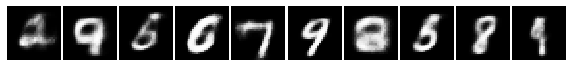

## $\alpha$ = 1.0

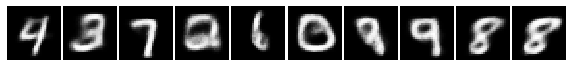

## $\alpha$ = 0.95

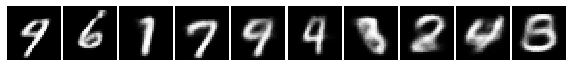

## $\alpha$ = 0.9

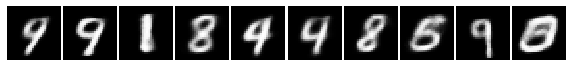

## $\alpha$ = 0.85

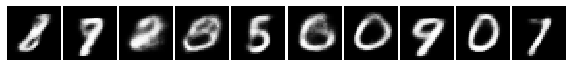

## Random interpolation

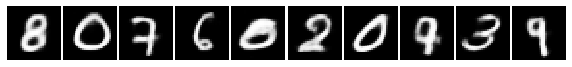

In [ ]:
z = torch.randn(10, 50).to(device='cuda')
import matplotlib.gridspec as gridspec
vae_model = torch.load('/content/drive/My Drive/VAE/vae.pth')
vae_model.eval()
samples = vae_model.decoder(z)
samples = samples.view(10, 1, 28, 28).data.cpu().numpy()

fig = plt.figure(figsize=(10, 1))
gspec = gridspec.GridSpec(1, 10)
gspec.update(wspace=0.05, hspace=0.05)
for i, sample in enumerate(samples):
    ax = plt.subplot(gspec[i])
    plt.axis('off')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_aspect('equal')
    plt.imshow(sample.reshape(28,28), cmap='Greys_r')
    # plt.savefig(os.path.join(GOOGLE_DRIVE_PATH,'vae_generation.jpg'))



In [ ]:
[ '/content/drive/My Drive/models/iwae.pth',
  '/content/drive/My Drive/VAE/vae_0_1.pth',
  '/content/drive/My Drive/VAE/vae_0_2.pth',
  '/content/drive/My Drive/VAE/vae_0_3.pth',
  '/content/drive/My Drive/VAE/vae_0_4.pth',
  '/content/drive/My Drive/VAE/vae_0_5.pth',
  '/content/drive/My Drive/VAE/vae_0_6.pth',
  '/content/drive/My Drive/VAE/vae_0_7.pth',
  '/content/drive/My Drive/models/vae_0_8.pth',
  '/content/drive/My Drive/models/vae_0_9.pth',
  '/content/drive/My Drive/VAE/vae.pth' ]

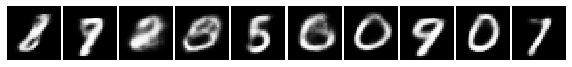

In [ ]:
z = torch.randn(10, latent_size).to(device='cpu')
import matplotlib.gridspec as gridspec
vae_model.eval()
samples = vae_model.decoder(z)
# sample_mu = vae_model.mu_layer1(samples)
# sample_logvar = vae_model.logvar_layer1(samples)
# x_hat = reparametrize(sample_mu, sample_logvar)
# s = nn.Sigmoid()
# x_hat = s(x_hat)
samples = samples.view(10, 1, 28, 28).data.cpu().numpy()

fig = plt.figure(figsize=(10, 1))
gspec = gridspec.GridSpec(1, 10)
gspec.update(wspace=0.05, hspace=0.05)
for i, sample in enumerate(samples):
    ax = plt.subplot(gspec[i])
    plt.axis('off')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_aspect('equal')
    plt.imshow(sample.reshape(28,28), cmap='Greys_r')
    # plt.savefig(os.path.join(GOOGLE_DRIVE_PATH,'vae_generation.jpg'))


## Latent Space Interpolation

As a final visual test of our trained VAE model, we can perform interpolation in latent space. We generate random latent vectors $z_0$ and $z_1$, and linearly interpolate between them; we run each interpolated vector through the trained generator to produce an image.

Each row of the figure below interpolates between two random vectors. For the most part the model should exhibit smooth transitions along each row, demonstrating that the model has learned something nontrivial about the underlying spatial structure of the digits it is modeling.

In [ ]:
S = 12
latent_size = 15
device = 'cuda'
z0 = torch.randn(S,latent_size , device=device)
z1 = torch.randn(S, latent_size, device=device)
w = torch.linspace(0, 1, S, device=device).view(S, 1, 1)
z = (w * z0 + (1 - w) * z1).transpose(0, 1).reshape(S * S, latent_size)
x = vae_model.decoder(z)
show_images(x.data.cpu())

## Normal plots

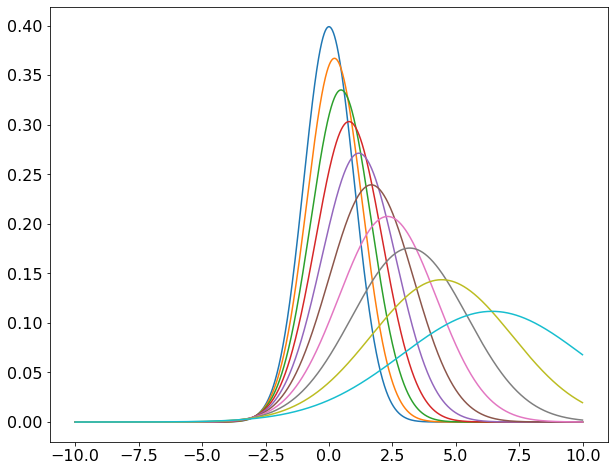

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

def egeo(mu1, s1, mu2, s2, alpha):
    mu = ((1-alpha)*s2*mu1 + alpha*s1*mu2)/((1-alpha)*s2 + alpha*s1)
    s = s1*s2/((1-alpha)*s2 + alpha*s1)
    return mu, s

mean = []
std = []
alpha = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for i in range(10):
  mu, s = egeo(0, 1, 10, 5, alpha[i])
  mean.append(mu)
  std.append(s)

# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(-10, 10, 0.01)

for i in range(10):
  plt.plot(x_axis, norm.pdf(x_axis, mean[i], std[i]))
plt.show()